In [1]:
import os

import pandas as pd
import geopandas as gpd

import shapely
from shapely.geometry import LineString

from gtfs_data import GTFSData

data_dir = r'Q:\SACSIM23\Network\TransitNetwork\GTFS\Auburn'
os.chdir(data_dir)

gtfs = GTFSData(gtfs_dir=data_dir, data_year=2020)


In [11]:
# for a single trip, get geometry of its trip line shape and geom of stops made on that trip

test_trip_id = 't_1063569_b_25331_tn_1'
df_test_trip = gtfs.df_trips.loc[gtfs.df_trips['trip_id'] == test_trip_id]
gdf_test_tripshp = df_test_trip.join(gtfs.gdf_lineshps, on='shape_id')
gdf_test_tripshp = gpd.GeoDataFrame(gdf_test_tripshp, geometry='geometry') # need this to make geo df instead of regular df

gdf_test_stops = df_test_trip.merge(gtfs.df_stoptimes, on='trip_id') \
                .merge(gtfs.gdf_stops, on='stop_id') \
                [['trip_id', 'stop_id', 'stop_sequence', 'geometry']].drop_duplicates() \
                .sort_values(by='stop_sequence')
gdf_test_stops = gpd.GeoDataFrame(gdf_test_stops, geometry='geometry') # need this to make geo df instead of regular df


In [12]:
# split trip's line by trip's stop points

gdf_test_stops.head()

# union all geometries
line = gdf_test_tripshp.geometry.unary_union
coords = gdf_test_stops.geometry.unary_union

# snap and split coords on line
# returns GeometryCollection
split_line = shapely.ops.split(line, shapely.ops.snap(coords, line, tolerance=1.0))

# transform Geometry Collection to GeoDataFrame
segments = [feature for feature in split_line]

gdf_segments = gpd.GeoDataFrame(
list(range(len(segments))), geometry=segments)
gdf_segments.columns = ['index', 'geometry']


In [13]:
# iterate trhough line segments
gdf_segments['trip_id'] = test_trip_id

# but start with a test segment
test_seg = gdf_segments['geometry'][0]

# select the stops that touch that geometry
gdf_test_stops['segtouch'] = gdf_test_stops.distance(test_seg)

gdf_test_stops

,trip_id,stop_id,stop_sequence,geometry,segtouch
0,t_1063569_b_25331_tn_1,2583249,1,POINT (6822690.756 2092122.871),16.921069
1,t_1063569_b_25331_tn_1,2583282,2,POINT (6823984.461 2089346.868),1968.908536
2,t_1063569_b_25331_tn_1,2583262,3,POINT (6823668.191 2083030.152),8083.820952
3,t_1063569_b_25331_tn_1,2583266,4,POINT (6824687.759 2085930.836),5407.935869
4,t_1063569_b_25331_tn_1,2583280,5,POINT (6824612.540 2087169.829),4213.578575
5,t_1063569_b_25331_tn_1,2583284,6,POINT (6825924.682 2090461.426),2920.724427
7,t_1063569_b_25331_tn_1,2583281,7,POINT (6826700.861 2091593.675),3662.535817
8,t_1063569_b_25331_tn_1,2583250,8,POINT (6826969.361 2091164.843),3897.198049
9,t_1063569_b_25331_tn_1,2583244,9,POINT (6827538.070 2090768.963),4476.897660
10,t_1063569_b_25331_tn_1,2583268,10,POINT (6827866.025 2090897.988),4797.106953


<AxesSubplot:>

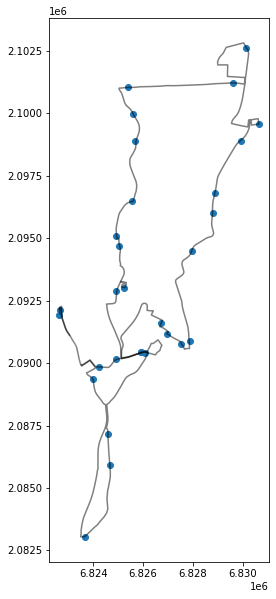

In [23]:
# ax = gdf_segments.loc[gdf_segments.index == 0].plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax = gdf_segments.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df_nearest_seg = gdf_test_stops.loc[gdf_test_stops['segtouch'] < 100]
gdf_test_stops.plot(ax=ax)